<a href="https://colab.research.google.com/github/amir1913/PUS2022_AMeydani/blob/main/HW4/1Geospatial_NYCCitiBike_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# reproducible Spatial Data Analysis with pandas
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

Use this notebook we examined in class 
https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb

as well as the notebooks we wrote together 
https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/Part_I_GeospatialAnalysis_CitiBike.ipynb

# 0 Install geospatial libraries

In [1]:
!pip install geopandas
!apt install python3-rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.7 MB/s eta 0:00:00
  Using cached Fiona-1.8.21-cp37-cp37m-manylinux2014_x86_64.whl (16.7 MB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 80.5 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.8/500.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


## 0.1 Import initial libraries

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Working with a Shape File of Census Tracts

### 1.1 Loading Census Tract GeoJSON File


In [3]:
ct_shape = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [4]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      2165 non-null   object  
 1   shape_area   2165 non-null   object  
 2   ntaname      2165 non-null   object  
 3   shape_leng   2165 non-null   object  
 4   boro_name    2165 non-null   object  
 5   puma         2165 non-null   object  
 6   ct2010       2165 non-null   object  
 7   boro_code    2165 non-null   object  
 8   cdeligibil   2164 non-null   object  
 9   boro_ct2010  2165 non-null   object  
 10  ctlabel      2165 non-null   object  
 11  geometry     2165 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 203.1+ KB


## 1.2 Coordinate systems, projections, and transformations : 

### Visualize the Census Tract boundaries colored by boroughs

the file you read in into a geodataframe, which I will call generically ```gpd``` in these instructions, contains the "boro_code" column. To color by a column value (and the column can be numerical or categorical) you pass the column name to ```gdp.plot``` as
```gdp.plot(column="columnName")```

Text(43.71715543205136, 0.5, 'longitude (deg)')

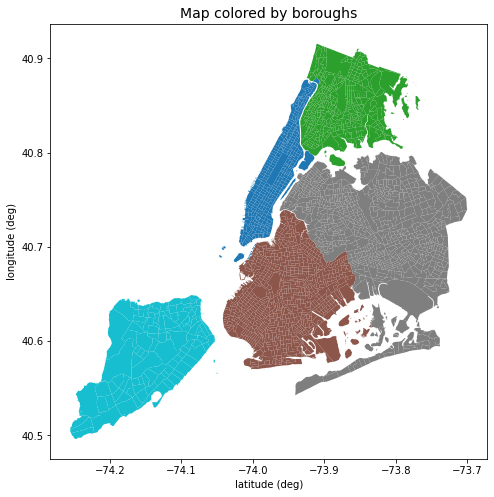

In [5]:
plt_boro = ct_shape.plot(column="boro_code", figsize=(8,8))
plt_boro.set_title("Map colored by boroughs", fontsize=14)
plt_boro.set_xlabel("latitude (deg)")
plt_boro.set_ylabel("longitude (deg)")






Fig 1. The figure shows New York city's booroughs and neighborhoods.

Text(43.71715543205136, 0.5, 'longitude (deg)')

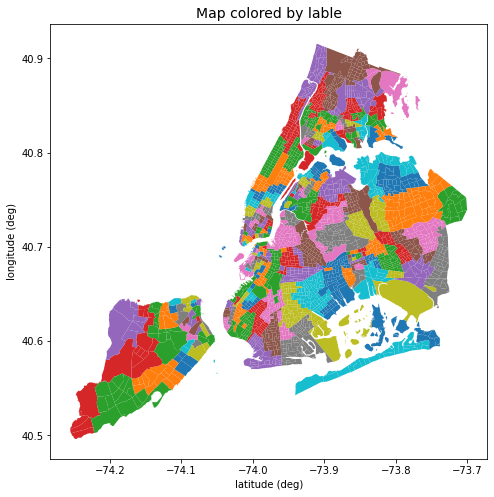

In [6]:
lable_plt = ct_shape.plot(column='ctlabel', figsize=(8,8))
lable_plt.set_title("Map colored by lable", fontsize=14)
lable_plt.set_xlabel("latitude (deg)")
lable_plt.set_ylabel("longitude (deg)")

Fig 2. The figure shows New York city's areas with different lables.

### Measure Areas

In [7]:
ct_shape.head()

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."


As discussed in class, you cannot use coordinates in latitude and longitude degree units to measure areas of polygons: you need first to project on a plane.

* Convert the coordinates of  your geodataframe, here referred to  as gpd, to a projected EPSG:2263 which is coordinated in feet, instead of lat long degrees. centered near NYC

  use 

```gpd.to_crs("EPSG:2263")```

* Extract the area of each gemetry : the geometry column has many relevant methods. use (as we did in class)

```gpd.geometry.area```

* Create a new column in your dataframe called "shape_areami2" and set it equal to the area of the polygon in miles squared. the feet to miles conversion is here 
https://www.google.com/search?sxsrf=ALeKk03B4ThQrJJXpFzoCrgRfrJ1nByPMg%3A1600870977934&ei=QVprX9muOIOl_QbOtaOwCQ&q=feet+to+mile&oq=feet+to+mile&gs_lcp=CgZwc3ktYWIQAzIICAAQsQMQkQIyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgAEEc6BAgjECc6BQgAELEDOgoIABCxAxAUEIcCUM_1AVjK-AFgzPoBaABwAngAgAFkiAHvApIBAzMuMZgBAKABAaoBB2d3cy13aXrIAQjAAQE&sclient=psy-ab&ved=0ahUKEwiZ0-GPvf_rAhWDUt8KHc7aCJYQ4dUDCA0&uact=5


* Calculate the total area of NYC in miles squared. 

* On epsg.io  look up the EPSG:2263. What is the accuracy when this projection is used in NYC?



In [8]:
ct_shape_prime = ct_shape.to_crs("EPSG:2263")
ft_mi = np.square(5280)
ct_shape_prime["shape_areami2"] = (ct_shape_prime.geometry.area / ft_mi)
NY_area = np.sum(ct_shape_prime["shape_areami2"])
print ('New York land area: {:.0f} (sq mi)\n'.format(NY_area)) 
#print('According to epsg.io, EPSG:2263 (NYC) is accurate to within 4 meters')
#print('--> According to the internet, the land area of NYC is 304.8 sq.mi')

New York land area: 302 (sq mi)



In [9]:
ct_shape_prime.head()

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,shape_areami2
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288....",0.089568
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005....",0.068369
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091....",0.066754
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199....",0.066883
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517....",0.067827


By searching through the net, it can be understood that New York is accurate to within 2 meters. Accordingly, the total land area of New York is 302.6 sq mi.

### Choropleths of NYC

a choropleth is a map where the color of a polygon is mapped to a value. Perhaps the easiest thing to envision is to map the color to the size of the polygon. To make a choropleth of your python geodataframe (gdp) you can use, like before but this time with a numerical column:

```gdp.plot(column="theNameOfMyColumn")```

The problem is that the column has to be numeric. I want you to use "shape_area" but "shape_area" is not directly read in as a numerical column (you can tell when you run gdp.info(): it says its a type "object").

Convert gdp["shape_area"] to numeric by passing it to the pandas function

```pd.to_numeric()``` with the argument 

```error="coerce"```

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html




In [10]:
ct_shape_prime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ntacode        2165 non-null   object  
 1   shape_area     2165 non-null   object  
 2   ntaname        2165 non-null   object  
 3   shape_leng     2165 non-null   object  
 4   boro_name      2165 non-null   object  
 5   puma           2165 non-null   object  
 6   ct2010         2165 non-null   object  
 7   boro_code      2165 non-null   object  
 8   cdeligibil     2164 non-null   object  
 9   boro_ct2010    2165 non-null   object  
 10  ctlabel        2165 non-null   object  
 11  geometry       2165 non-null   geometry
 12  shape_areami2  2165 non-null   float64 
dtypes: float64(1), geometry(1), object(11)
memory usage: 220.0+ KB


"Shape_area" has an object data type.

In [11]:
ct_shape_prime["shape_area"] = pd.to_numeric(ct_shape_prime["shape_area"], errors="coerce")

* make a coropleth using "shape_area"

Text(26.886407101000017, 0.5, 'North feeting')

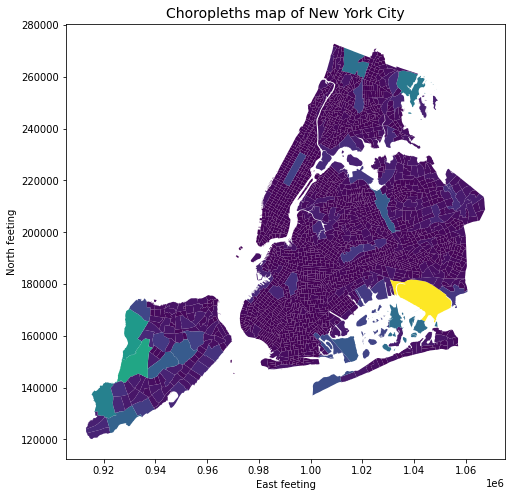

In [12]:
chro_plt = ct_shape_prime.plot(column="shape_area", figsize=(8,8))
chro_plt.set_title("Choropleths map of New York City", fontsize=14)
chro_plt.set_xlabel("East feeting")
chro_plt.set_ylabel("North feeting")

Fig 3. The Choropleth map of New York City is shown based on the polygons' area. The bigger polygon is, the lighter it is indicated.

* Now use your column "shape_areami2" - the colors should be mapped the same way

Text(26.886407101000017, 0.5, 'North feeting')

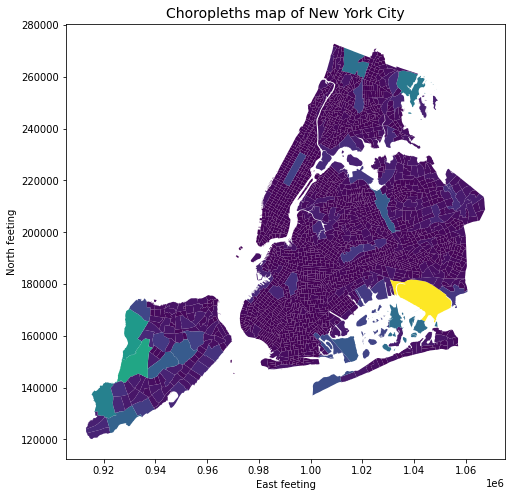

In [13]:
chro_plt2 = ct_shape_prime.plot(column="shape_areami2", figsize=(8,8))
chro_plt2.set_title("Choropleths map of New York City", fontsize=14)
chro_plt2.set_xlabel("East feeting")
chro_plt2.set_ylabel("North feeting")

Fig 4. The Choropleth map of New York City is shown based on the polygons' area (Shape_areami2). The bigger polygon is, the lighter it is indicated.

* Now lets put some numerical values to the colors. you can do by adding the argument 

```legend=True```

 to the choropleth gdp.plot() call

Text(23.25, 0.5, 'North feeting')

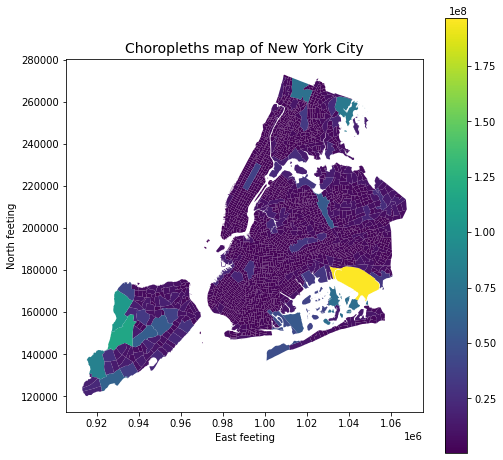

In [14]:
chro_plt2 = ct_shape_prime.plot(column="shape_area", legend=True, figsize=(8,8))
chro_plt2.set_title("Choropleths map of New York City", fontsize=14)
chro_plt2.set_xlabel("East feeting")
chro_plt2.set_ylabel("North feeting")

Fig 5. The Choropleth map of New York City is shown based on the polygons' area. The bigger polygon is, the lighter it is indicated color bar. the unit is square feet.

Text(23.25, 0.5, 'North feeting')

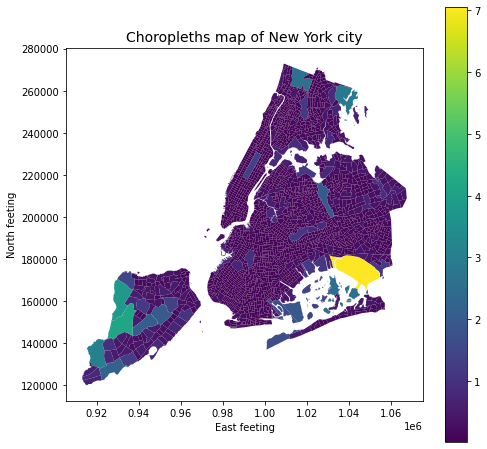

In [15]:
chro_plt2 = ct_shape_prime.plot(column="shape_areami2", legend=True, figsize=(8,8))
chro_plt2.set_title("Choropleths map of New York city", fontsize=14)
chro_plt2.set_xlabel("East feeting")
chro_plt2.set_ylabel("North feeting")

Fig 6. The Choropleth map of New York City is shown based on the polygons' area. The bigger polygon is, the lighter it is indicated color bar. the unit is square mile.

Often a more useful way to read numers associated to colors is to use quantiles. For this yuo need to install 

```mapclassify```

In [16]:
!pip install mapclassify
import mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 24.1 MB/s eta 0:00:00


Use mapclassify to plot the distribution quartiles

Text(26.886407101000017, 0.5, 'North feeting')

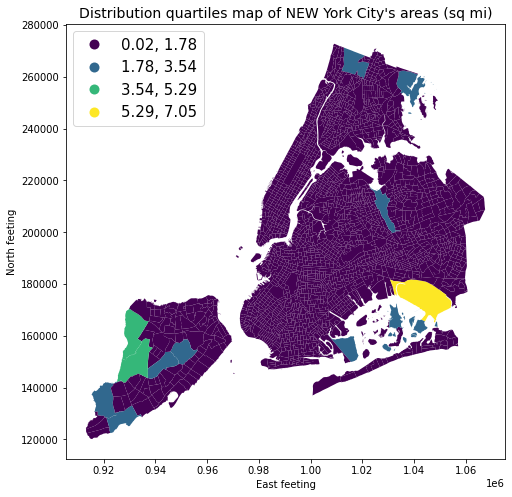

In [17]:

map = ct_shape_prime.plot(column='shape_areami2', cmap='viridis', alpha=1,
              linewidth=0.1, scheme="Equal_interval", figsize=(8,8),
              legend=True, k=4, legend_kwds={'loc': 'upper left', 'fontsize':15});
map.set_title("Distribution quartiles map of NEW York City's areas (sq mi)", fontsize=14)
map.set_xlabel("East feeting")
map.set_ylabel("North feeting")

Fig 7. Distribution quartiles map of NEW York City's polygons. Each point shows the range of polygon's size in square mile.

(At some point i got so tired of moving the legend around that i made a whole package to plot choropleths of NYC https://github.com/fedhere/choroplethNYC )

# 2 Explore CitiBike data

### 2.1 Load CitiBike data for 9/2013

In [18]:
cb201609 = pd.read_csv('https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip', index_col='starttime')
cb201609.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
9/1/2016 00:00:02,975,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
9/1/2016 00:00:04,1220,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
9/1/2016 00:00:19,308,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
9/1/2016 00:00:25,250,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
9/1/2016 00:00:25,439,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


## 2.2 Explore the dataset, you know how!

In [19]:
print(cb201609.columns)
print(" ")
cb201609.info()

Index(['tripduration', 'stoptime', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')
 
<class 'pandas.core.frame.DataFrame'>
Index: 1648856 entries, 9/1/2016 00:00:02 to 9/30/2016 23:59:51
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1648856 non-null  int64  
 1   stoptime                 1648856 non-null  object 
 2   start station id         1648856 non-null  int64  
 3   start station name       1648856 non-null  object 
 4   start station latitude   1648856 non-null  float64
 5   start station longitude  1648856 non-null  float64
 6   end station id           1648856 non-null  int64  
 7   end station name         1648856 non-null  obje

## 2.3 Map CitiBike Data at the census tract level

### Create a stations dataframe with spatial info
 
this is done alrady in the notebook we reviewed in class. The steps are:

* groupby station and take the first row of wach group with 

```gdp.groupby("...").first()```

* call your new dataframe "cbstations"

In [20]:
cbstations = cb201609.groupby('start station id').first()
cbstations = cbstations.dropna()

### Create CitiBike station Geometry (Point) from Coordinates (Lat & Lon)

from each pair of latitude and longitude coordinates for the start station make a shapely Point object (see https://github.com/fedhere/PUS2022_FBianco/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb)

In [24]:
cbstations['lonlat'] = gpd.points_from_xy(cbstations['start station longitude'], cbstations['start station latitude'], crs="EPSG:2263")
cbstations['lonlat']

start station id
72      POINT (-73.994 40.767)
79      POINT (-74.007 40.719)
82      POINT (-74.000 40.711)
83      POINT (-73.976 40.684)
116     POINT (-74.001 40.742)
                 ...          
3431    POINT (-73.978 40.747)
3432    POINT (-73.977 40.663)
3434    POINT (-73.977 40.790)
3435    POINT (-73.996 40.719)
3436    POINT (-74.010 40.721)
Name: lonlat, Length: 616, dtype: geometry

In [21]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1


### plot the stations

* Turn the dataframe into a geodataframe (as I did in class in the example above)

* Every geodataframe needs a geometry column: assign latlon to the "geometry"

* Set the crs to “EPSG:4326” with 
```gdp.set_crs()```

* Plot the locations of the stations

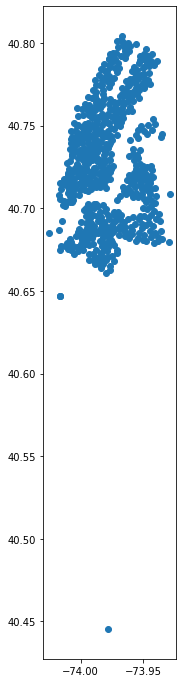

In [25]:
cbstations = gpd.GeoDataFrame(cbstations)
cbstations["geometry"] = cbstations['lonlat']
cbstations = cbstations.set_crs(4326, allow_override = True)
cbstations.plot(figsize = (12, 12))

Fig 8. Location of bike stations in New York City without map layer of the city.

convert the geometry projection to the same one you used for the NYC census tracts and replot with the census tracts map in the background


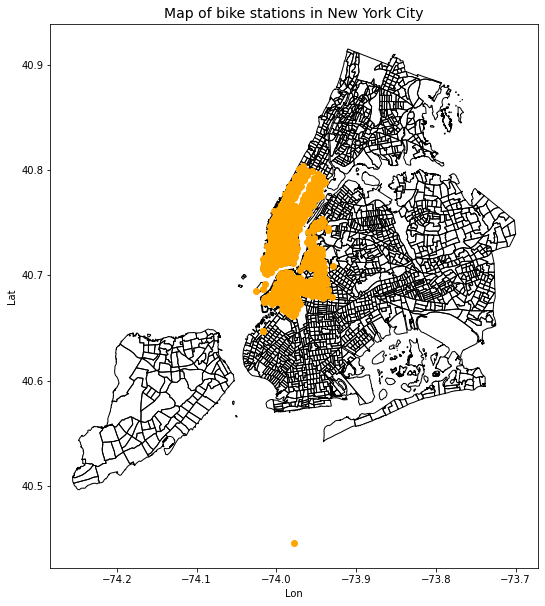

In [26]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_title("Map of bike stations in New York City", fontsize=14)
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');



Fig 9. Location of bike stations in New York City. Each dot shows an station.

### cleaning data

Clearly there is an data stored incorrectly: that station at the bottom is in the water. Remove it by selecting "start station latitude" greater than some appropriate value and replot

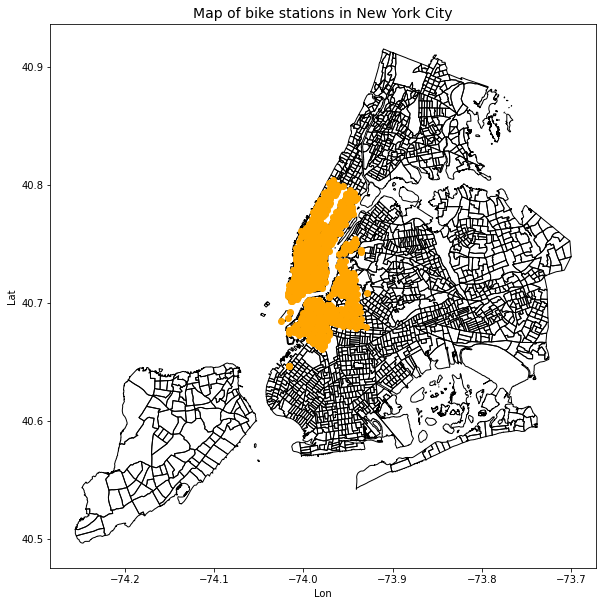

In [27]:
cbstations = cbstations[cbstations['lonlat'].y > 40.475]

f, ax = plt.subplots(figsize=(10,10))
ax.set_title("Map of bike stations in New York City", fontsize=14)
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")

ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

Fig 10. Location of bike stations in New York City when noise data is removed. Each dot shows an station

### zoom into the relevant area 

zoom-in into the relevant area using ```ax.set_xlim()``` and ```ax.set_ylim()```

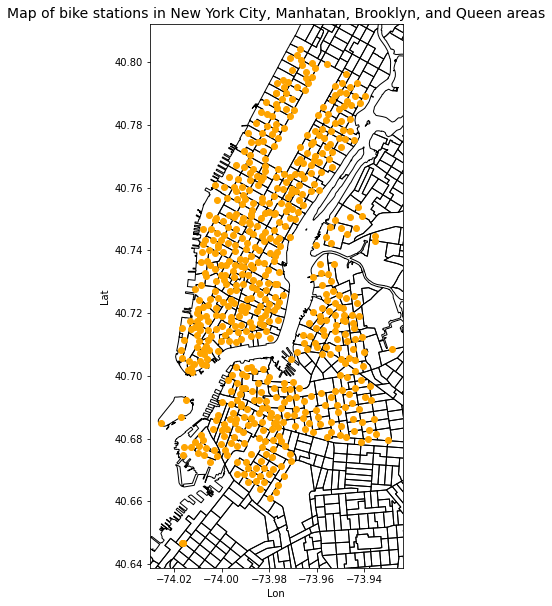

In [28]:
#replot 
f, ax = plt.subplots(figsize=(10,10))
ax.set_title("Map of bike stations in New York City, Manhatan, Brooklyn, and Queen areas", fontsize=14)
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")

xLims = (np.amin(cbstations['lonlat'].x), np.amax(cbstations['lonlat'].x))
xMar = np.abs(xLims[1] - xLims[0]) * 0.05
yLims = (np.amin(cbstations['lonlat'].y), np.amax(cbstations['lonlat'].y))
yMar = np.abs(yLims[1] - yLims[0]) * 0.05
ax.set_xlim(xLims[0] - xMar, xLims[1] + xMar)
ax.set_ylim(yLims[0] - yMar, yLims[1] + yMar)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

Fig 11. Location of bike stations in Manhatan and Brooklyn regions in New York city. 

# 3 Assigning points to polygons


## 3.1 Assign each station to a Borough

### Intrsect the census tract and citi bikes geometries manually

``` gdp.ct_shape.geometry.intersect```

First, let me do this by intersecting the shapes "manually" in a for loop. This should be transparent as far as the syntax go but it is very computationally inefficient


In [29]:
cbstations["boro_name"] = ''
# check for each citibike stations to see what CT they are belong to
for i in cbstations.index:
    a = ct_shape[ct_shape.geometry.intersects(
        cbstations.loc[i].geometry)]["boro_name"].values[0]
    
    cbstations.loc[i,'boro_name'] = a


In [30]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,geometry,boro_name
start station id,,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.994 40.767),POINT (-73.99393 40.76727),Manhattan
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.007 40.719),POINT (-74.00667 40.71912),Manhattan
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.000 40.711),POINT (-74.00017 40.71117),Manhattan
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.976 40.684),POINT (-73.97632 40.68383),Brooklyn
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.001 40.742),POINT (-74.00150 40.74178),Manhattan


### overplot the map locations on top of the census tract boundaries in the zoom in version (as before) but this time color the points by NYC Borough

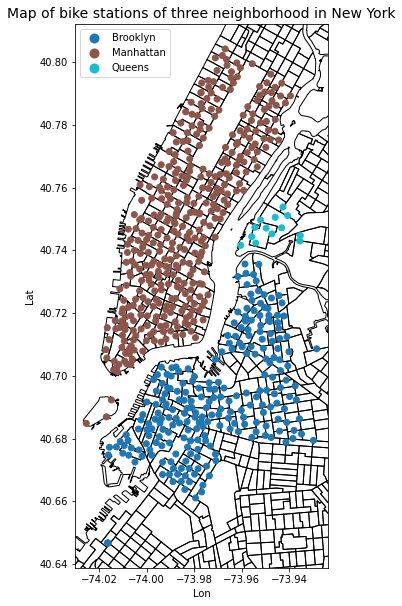

In [31]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_title("Map of bike stations of three neighborhood in New York", fontsize=14)
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")

xLims = (np.amin(cbstations['lonlat'].x), np.amax(cbstations['lonlat'].x))
xMar = np.abs(xLims[1] - xLims[0]) * 0.05
yLims = (np.amin(cbstations['lonlat'].y), np.amax(cbstations['lonlat'].y))
yMar = np.abs(yLims[1] - yLims[0]) * 0.05
ax.set_xlim(xLims[0] - xMar, xLims[1] + xMar)
ax.set_ylim(yLims[0] - yMar, yLims[1] + yMar)
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, column = 'boro_name', legend = True);

Fig 12. Bike stations in three different areas of New York City.

## 3.2 create a colopleth of NYC census tracts where the color maps to the number of citibike stations


### Perform a spatial join

Perfoming an $n \times m$ intersection test is horrifically inefficient and slow. Spatial joins use an R-tree for spatial indexing to rapidly join the tables on their geometries. 

Spatial joins operate on objects with eastings and northings, i.e., you must use two geodataframs with the same CRS, and that needs ot be a CRS expressed with dimensioned lengths. This will NOT work on data expressed in lat/long.

use 

```geopandas.tools.sjoin()``` 
passing to it ct_shape and cbstations to get a dataframe that for every station row has the census tract value in a ```boro_ct2010``` column

In [32]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#!pip uninstall rtree
#!sudo apt install libspatialindex-dev
#!pip install rtree

Without running below code, line 37 gave an error of "Spatial indexes require either `rtree` or `pygeos` in geopanda but rtree is installed"

In [34]:
!pip install -q condacolab -q

import condacolab

condacolab.install()

✨🍰✨ Everything looks OK!


In [35]:
import geopandas as gpd
cbstationsWct = gpd.tools.sjoin(ct_shape, cbstations)
cbstationsWct

,ntacode,shape_area,ntaname,shape_leng,boro_name_left,puma,ct2010,boro_code,cdeligibil,boro_ct2010,...,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,boro_name_right
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,3140,1 Ave & E 78 St,40.771404,-73.953517,19938,Customer,1990.0,0,POINT (-73.966 40.755),Manhattan
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,401,Allen St & Rivington St,40.720196,-73.989978,15618,Subscriber,1992.0,1,POINT (-73.967 40.756),Manhattan
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,530,11 Ave & W 59 St,40.771522,-73.990541,24994,Subscriber,1965.0,1,POINT (-73.974 40.760),Manhattan
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,305,E 58 St & 3 Ave,40.760958,-73.967245,25802,Subscriber,1986.0,1,POINT (-73.973 40.762),Manhattan
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,...,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,20969,Subscriber,1986.0,1,POINT (-73.976 40.760),Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,BK99,27403404.9301,park-cemetery-etc-Brooklyn,24250.8583554,Brooklyn,4005,017700,3,I,3017700,...,3354,3 St & Prospect Park West,40.668132,-73.973638,19360,Customer,1979.0,0,POINT (-73.974 40.668),Brooklyn
2150,MN17,2434388.01123,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,157,Henry St & Atlantic Ave,40.690893,-73.996123,19425,Subscriber,1982.0,1,POINT (-73.982 40.765),Manhattan
2150,MN17,2434388.01123,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,3173,Riverside Blvd & W 67 St,40.777507,-73.988886,19303,Subscriber,1982.0,1,POINT (-73.982 40.767),Manhattan
2151,MN15,1954943.58918,Clinton,5774.68293551,Manhattan,3807,013900,1,I,1013900,...,449,W 52 St & 9 Ave,40.764618,-73.987895,16842,Subscriber,1983.0,1,POINT (-73.989 40.768),Manhattan


### groupby the geodataframe resulting from the spatial join grouping based on the census tract (e.g. use "boro_ct2010") and _count_ the number of station per boro_ct2010 value



### merge the geodataframe resulting from the spatial join + groupby  with the original census tract geodataframe. NOTE: you should remove the geometry column from the first dataframe before you merge cause you want the geometry to be inherited from the census tracts geodataframe. In fact, from the first geodataframe, you need _only_ one column that contains the number of stations for that geometry group

### plot the census tracts in the background (in black and white) and overplot a coropleth of the number of stations per census tract: the latter is the geodataframe you produced above plotted with the column argument set to the column name of the column that contains the number of stations information

.... YOU ARE DONE!!

Text(56.875, 0.5, 'Lat')

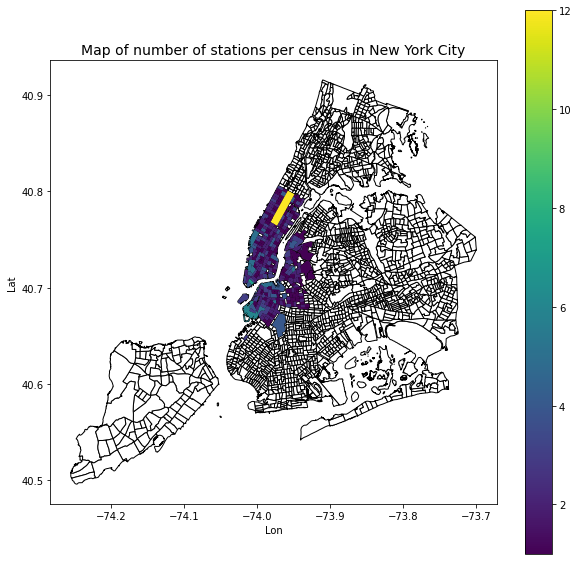

In [36]:
ctbycs = ct_shape.merge(cbstationsWct.groupby("boro_ct2010").count()[["ntacode"]], 
                        right_index=True, left_on="boro_ct2010")
ax = ct_shape.plot(ec="k", fc="w", figsize=(10,10))
ctbycs.plot(column="ntacode_y", legend=True, ax=ax)
ax.set_title("Map of number of stations per census in New York City", fontsize=14)
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")

Fig 13. The map of the number of bike stations in each polygon is indicated by a colour bar. The higher the number, the brighter the colour is.

Comment: This is a little weird why Central Park has more bike stations while a few stations are shown in Fig 12 Unless the stations on the border of Central Park's polygon are included in this area.